Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/6t/fcfkw2p97jlgqfzgfmqhybt40000gr/T/ipykernel_34216/361325798.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Variance of stim corr Like-Like, All: 0.06944071164204461
Variance of stim corr Like-Like, Connected: 0.06918998248503287


/var/folders/6t/fcfkw2p97jlgqfzgfmqhybt40000gr/T/ipykernel_34216/361325798.py:95: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


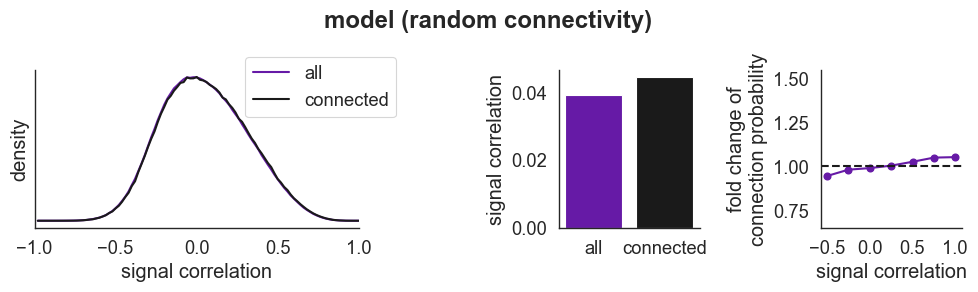

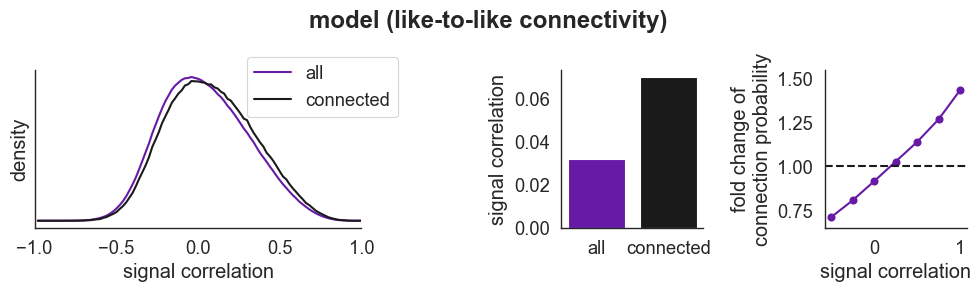

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time as tm
import seaborn as sns
import pickle

SaveFigures=True

p0=0.1

sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":1.5})
sns.set_palette('muted')

filename='./Data/RandAndLikeLikeHists.npy'
with open(filename, 'rb') as f:
    objects = pickle.load(f)


hAllEERand=objects['hAllEERand']
hConnEERand=objects['hConnEERand']
hUnconnEERand=objects['hUnconnEERand']
hAllEELikeLike=objects['hAllEELikeLike']
hConnEELikeLike=objects['hConnEELikeLike']
hUnconnEELikeLike=objects['hUnconnEELikeLike']
CorrBins=objects['CorrBins']

mAllEECorrsRand=objects['mAllEECorrsRand']
mConnectedEECorrsRand=objects['mConnectedEECorrsRand']
mUnconnectedEECorrsRand=objects['mUnconnectedEECorrsRand']
mAllEECorrsLikeLike=objects['mAllEECorrsLikeLike']
mConnectedEECorrsLikeLike=objects['mConnectedEECorrsLikeLike']
mUnconnectedEECorrsLikeLike=objects['mUnconnectedEECorrsLikeLike']

vAllEECorrsRand=objects['vAllEECorrsRand']
vConnectedEECorrsRand=objects['vConnectedEECorrsRand']
vUnconnectedEECorrsRand=objects['vUnconnectedEECorrsRand']

vAllEECorrsLikeLike=objects['vAllEECorrsLikeLike']
vConnectedEECorrsLikeLike=objects['vConnectedEECorrsLikeLike']
vUnconnectedEECorrsLikeLike=objects['vUnconnectedEECorrsLikeLike']

ConnProbAtStimCorrRand=objects['ConnProbAtStimCorrRand']
ConnProbAtStimCorrLikeLike=objects['ConnProbAtStimCorrLikeLike']
StimCorrBins=objects['StimCorrBins']

print('Variance of stim corr Like-Like, All:',vAllEECorrsLikeLike)
print('Variance of stim corr Like-Like, Connected:',vConnectedEECorrsRand)

AllColor=[.4,.1,.65]

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
#plt.plot(CorrBins[1:],hUnconnEERand,'r', label="unconnected")#: mean corr={:.3f}".format(mUnconnectedEECorrsRand))
plt.plot(CorrBins[1:],hAllEERand,color=AllColor, label="all")#: mean corr={:.3f}".format(mAllEECorrsRand))
plt.plot(CorrBins[1:],hConnEERand,'k', label="connected") #: mean corr={:.3f}".format(mConnectedEECorrsRand))
plt.ylabel('density')
plt.xlabel('signal correlation')
plt.legend(loc=[.65,.7])
plt.xticks([-1,-.5,0,.5,1])
plt.xlim([-1,1])
plt.suptitle('model (random connectivity)', weight='bold')
plt.yticks([])
sns.despine()


plt.subplot(1,4,3)
plt.bar([0,1],[mUnconnectedEECorrsRand,mConnectedEECorrsRand],color=[AllColor,'k'],width=0.8,tick_label=['all','connected'])
plt.ylabel('signal correlation')
sns.despine()


plt.subplot(1,4,4)
plt.plot(StimCorrBins[1:],ConnProbAtStimCorrRand/p0,'-o',color=[.4,.1,.65])
plt.axhline(y = 1, color = 'k', linestyle = '--')
plt.xlabel('signal correlation')
plt.ylabel('fold change of\nconnection probability')
plt.xticks([-.5,.0,.5,1])
plt.ylim([.65,1.55])
sns.despine()


plt.tight_layout()


# Save figure if needed
if SaveFigures:
    plt.savefig('./Figures/HistAndBarsRand.eps')

    
    
###

plt.subplots(figsize=(10,3))
plt.subplot(1,2,1)
#plt.plot(CorrBins[1:],hUnconnEELikeLike,'r', label="unconnected")#: mean corr={:.3f}".format(mUnconnectedEECorrsLikeLike))
plt.plot(CorrBins[1:],hAllEELikeLike,color=AllColor, label="all")#: mean corr={:.3f}".format(mAllEECorrsLikeLike))
plt.plot(CorrBins[1:],hConnEELikeLike,'k', label="connected")#: mean corr={:.3f}".format(mConnectedEECorrsLikeLike))
plt.ylabel('density')
plt.xlabel('signal correlation')
plt.legend(loc=[.65,.7])
plt.xlim([-1,1])
plt.xticks([-1,-.5,0,.5,1])
plt.suptitle('model (like-to-like connectivity)', weight='bold')
plt.yticks([])
sns.despine()

plt.subplot(1,4,3)
plt.bar([0,1],[mUnconnectedEECorrsLikeLike,mConnectedEECorrsLikeLike],color=[AllColor,'k'],width=0.8,tick_label=['all','connected'])
plt.ylabel('signal correlation')
sns.despine()

plt.subplot(1,4,4)
plt.plot(StimCorrBins[1:],ConnProbAtStimCorrLikeLike/p0,'-o',color=AllColor)
plt.axhline(y = 1, color = 'k', linestyle = '--')
plt.xlabel('signal correlation')
plt.ylabel('fold change of\nconnection probability')
plt.ylim([.65,1.55])
sns.despine()

plt.tight_layout()

# Save figure if needed
if SaveFigures:
    plt.savefig('./Figures/HistAndBarsLikeLike.eps')

###    
    